In [142]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset


import pandas as pd

#url = 'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv'
#data = pd.read_csv(url)

import requests

url = 'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv'
response = requests.get(url)
response.raise_for_status()

# Specify the local file path to save the CSV file
csv_file_path = 'C:/Users/ADMIN/Desktop/flip/data.csv'

# Save the raw data to a local CSV file
with open(csv_file_path, 'w') as file:
    file.write(response.text)

print(f"CSV file saved to: {csv_file_path}")

import pandas as pd

# Specify the file path to the CSV file
csv_file_path = 'C:/Users/ADMIN/Desktop/flip/data.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(csv_file_path)
data



CSV file saved to: C:/Users/ADMIN/Desktop/flip/data.csv


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data has 907 rows × 27 columns

In [225]:
data.head(700)

,primary_fuel,capacity_mw
0,Solar,1.357209
1,Coal,4.610436
2,Wind,3.396999
3,Gas,5.129928
4,Coal,12.164404
...,...,...
695,Coal,15.820920
696,Coal,3.072317
697,Coal,10.997244
698,Biomass,2.519842


In [144]:
data.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
data.shape

(907, 27)

data has 907 rows and 27 columns out of which 1 is target and remaining are independent variable

In [146]:
data.columns
data.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [147]:
print(data.dtypes)


country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object


Data type is object, and float 64

In [148]:
#checking the null values
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

There area  null values in the data frame

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

<AxesSubplot:>

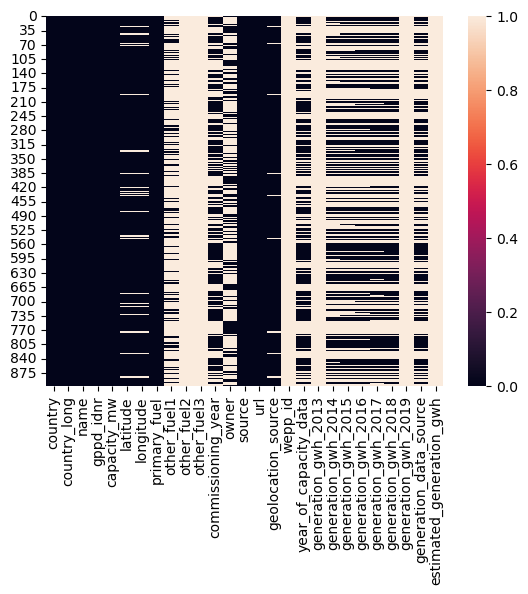

In [14]:
import seaborn as sns
sns.heatmap(data.isnull())

In [ ]:
there are null values as seen above also

In [16]:
# removing null values
import pandas as pd

# Check for null values
null_counts = data.isnull().sum()
print("Null Value Counts:")
print(null_counts)




Null Value Counts:
country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64


In [116]:
# Remove rows with null values
data_without_nulls = data.dropna()

# Verify if null values have been removed
null_counts_after_removal = data_without_nulls.isnull().sum()
print("Null Value Counts After Removal:")
print(null_counts_after_removal)

Null Value Counts After Removal:
country                     0.0
country_long                0.0
name                        0.0
gppd_idnr                   0.0
capacity_mw                 0.0
latitude                    0.0
longitude                   0.0
primary_fuel                0.0
other_fuel1                 0.0
other_fuel2                 0.0
other_fuel3                 0.0
commissioning_year          0.0
owner                       0.0
source                      0.0
url                         0.0
geolocation_source          0.0
wepp_id                     0.0
year_of_capacity_data       0.0
generation_gwh_2013         0.0
generation_gwh_2014         0.0
generation_gwh_2015         0.0
generation_gwh_2016         0.0
generation_gwh_2017         0.0
generation_gwh_2018         0.0
generation_gwh_2019         0.0
generation_data_source      0.0
estimated_generation_gwh    0.0
dtype: float64


In [19]:
data_without_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   0 non-null      object 
 1   country_long              0 non-null      object 
 2   name                      0 non-null      object 
 3   gppd_idnr                 0 non-null      object 
 4   capacity_mw               0 non-null      float64
 5   latitude                  0 non-null      float64
 6   longitude                 0 non-null      float64
 7   primary_fuel              0 non-null      object 
 8   other_fuel1               0 non-null      object 
 9   other_fuel2               0 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        0 non-null      float64
 12  owner                     0 non-null      object 
 13  source                    0 non-null      object 
 14  url                   

In [149]:
import pandas as pd

# Read the dataset into a DataFrame
url = 'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv'
data = pd.read_csv(url)

# Handle missing values
data.dropna(subset=['primary_fuel', 'capacity_mw'], inplace=True)

# Remove irrelevant columns if any
data = data[['primary_fuel', 'capacity_mw']]

# Convert data types if needed
data['capacity_mw'] = data['capacity_mw'].astype(float)

# Display the cleaned data
print(data.head())


  primary_fuel  capacity_mw
0        Solar          2.5
1         Coal         98.0
2         Wind         39.2
3          Gas        135.0
4         Coal       1800.0


In [150]:
import seaborn as sns

# Check if data_without_nulls DataFrame is empty
if data_without_nulls.empty:
    print("The DataFrame is empty. No heatmap can be plotted.")
else:
    # Plot heatmap of null values
    sns.heatmap(data_without_nulls.isnull())

The DataFrame is empty. No heatmap can be plotted.


In [151]:
# to check unique vqlues
data['primary_fuel'].unique()


array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [152]:
data['primary_fuel'].nunique()# number of unique values


8

In [3]:
data['commissioning_year'].nunique()# number of unique values


73

In [4]:
data['estimated_generation_gwh'].nunique()# number of unique values

0

In [153]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")
    

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64




In [154]:
data["primary_fuel"].unique()
data.shape[0]


907

In [155]:
data.loc[data["primary_fuel"]==" "]

,primary_fuel,capacity_mw


<AxesSubplot:>

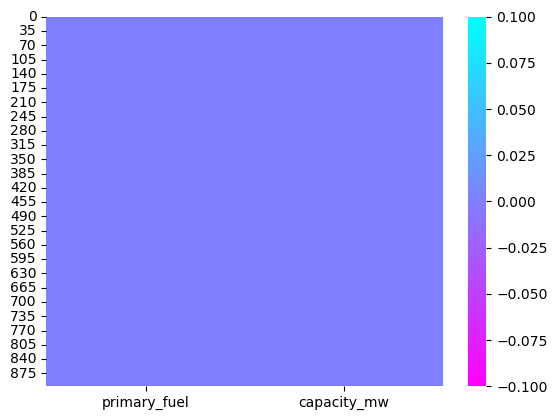

In [156]:
import seaborn as sns
sns.heatmap(data.isnull(),cmap="cool_r")

In [157]:
data.describe()

,capacity_mw
count,907.000000
mean,326.223755
std,590.085456
min,0.000000
25%,16.725000
50%,59.200000
75%,385.250000
max,4760.000000


In [158]:
#checking the unique values in each column
data.nunique().to_frame("No.of unique value")

,No.of unique value
primary_fuel,8
capacity_mw,361


In [159]:
numerical_columns = data.select_dtypes(include="number").columns
print(numerical_columns)


Index(['capacity_mw'], dtype='object')


In [160]:
categorical_colm = []
for i in data.columns:
    if data[i].dtype == "object":
        categorical_colm.append(i)

print("Categorical columns:", categorical_colm)


Categorical columns: ['primary_fuel']


 data visualization

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


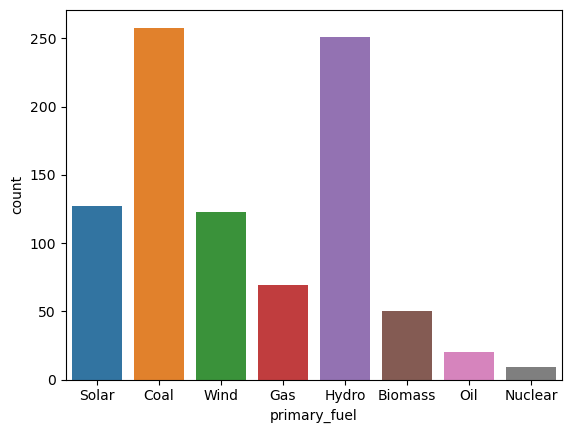

In [161]:

import seaborn as sns

if data["primary_fuel"].notnull().any():
    sns.countplot(x='primary_fuel', data=data)
    print(data["primary_fuel"].value_counts())
else:
    print("The 'primary_fuel' column does not contain any non-null values.")



5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


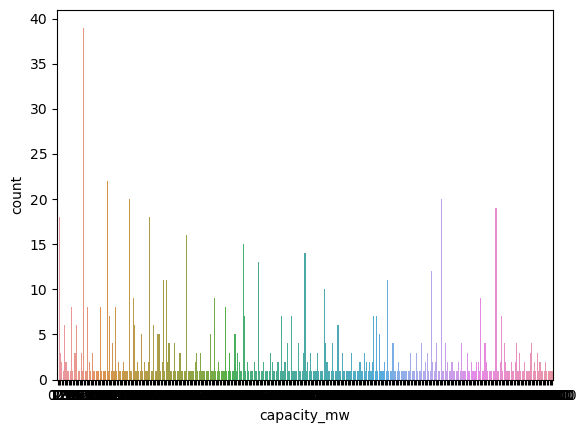

In [162]:

import seaborn as sns

if data["capacity_mw"].notnull().any():
    sns.countplot(x='capacity_mw', data=data)
    print(data["capacity_mw"].value_counts())
else:
    print("The 'capacity_mw' column does not contain any non-null values.")

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


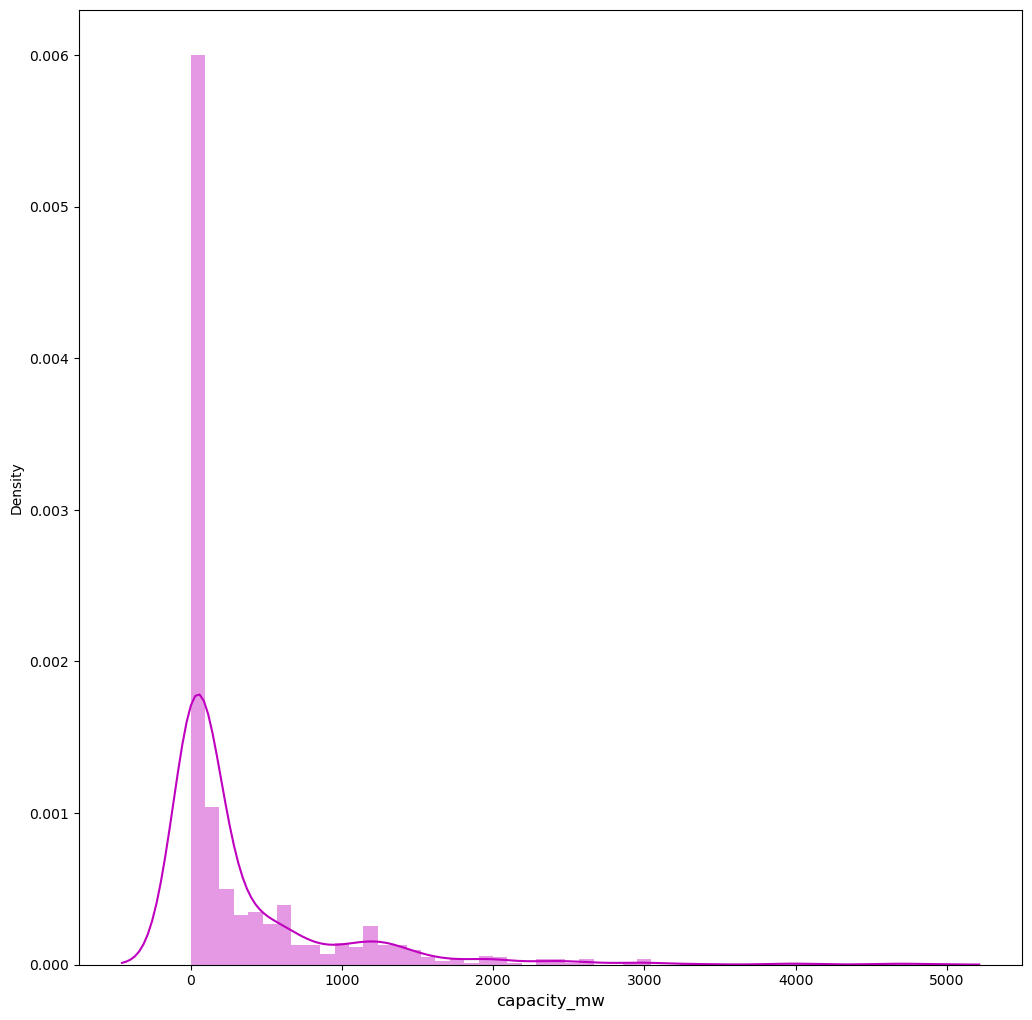

In [163]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20), facecolor="white")
plotnumber = 1
#numerical_columns = ['column1', 'column2', 'column3', 'column4']  # Replace with your actual numerical column names

for column in numerical_columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(data[column], color="m")
        plt.xlabel(column, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber += 1

plt.tight_layout()
plt.show()


capacity is skewed towards left capacity_mw', 'latitude', 'longitude', 'other_fuel3',
       'commissioning_year', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'estimated_generation_gwh

Multivariate Analysis

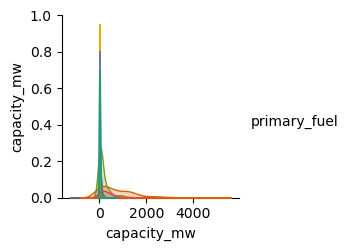

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' containing the desired data

sns.pairplot(data, hue='primary_fuel', palette='Dark2')
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


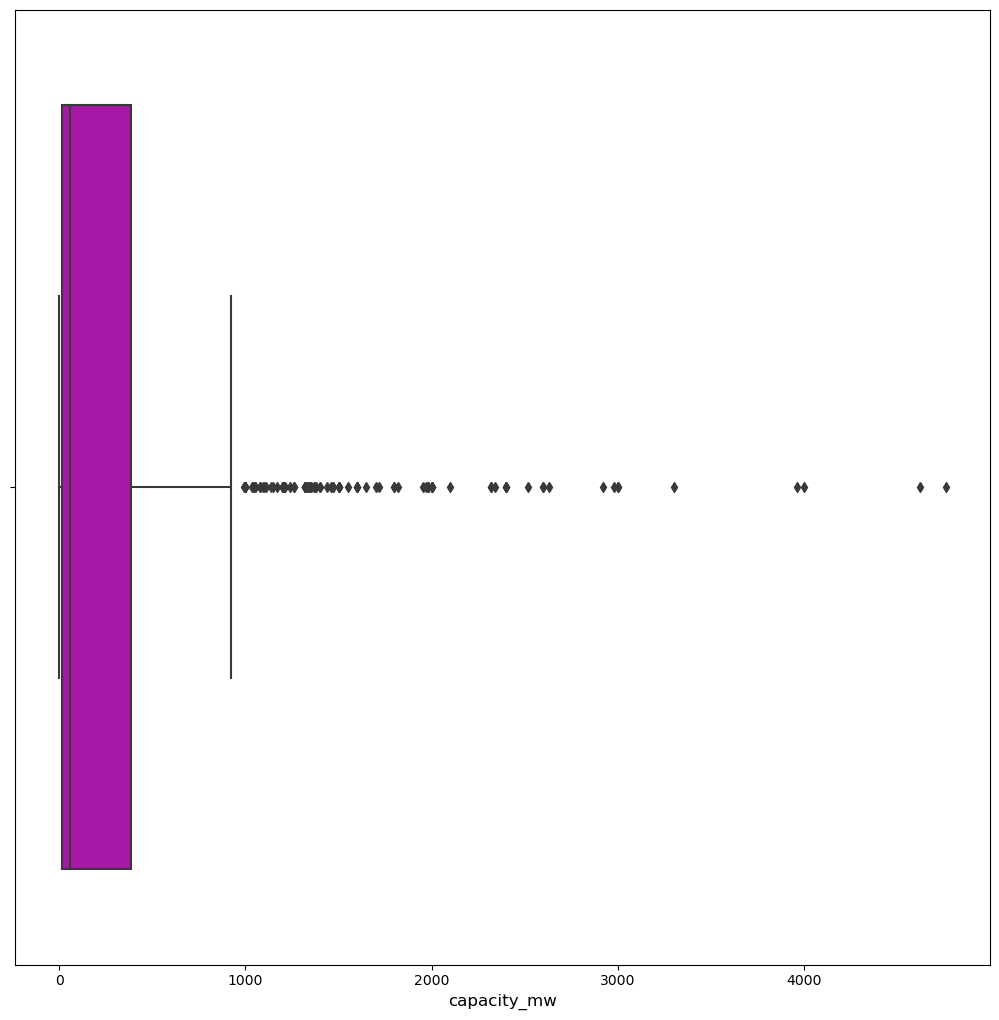

In [175]:
# Checking for outliners using box plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20), facecolor="white")
plotnumber = 1
numerical_columns = ["capacity_mw"] # Replace with your actual numerical column names

for column in numerical_columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(data[column], color="m")
        plt.xlabel(column, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+= 1

plt.tight_layout()
plt.show()

In [176]:
import numpy as np
from scipy.stats import zscore
out_feature=data[["capacity_mw"]]
z=np.abs(zscore(out_feature))
z

,capacity_mw
0,0.548908
1,0.386977
2,0.486679
3,0.324240
4,2.498942
...,...
902,2.159821
903,0.548060
904,0.509909
905,0.417498


In [177]:
np.where(z>3)

(array([ 15, 143, 147, 209, 308, 363, 364, 375, 482, 493, 494, 648, 657,
        695, 726, 767, 786, 788, 808, 880], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int64))

In [178]:
z.iloc[15,0]

3.906294028602196

In [179]:
#removing the data above z score and ceating new data frame
data1=data[(z<3).all(axis=1)]
data1.shape

(887, 2)

In [180]:
print("data loss percentage:-",((data.shape[0])-data1.shape[0])/100)

data loss percentage:- 0.2


In [181]:
data.skew()#-05 to +0.5

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9368\2128461393.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()#-05 to +0.5


capacity_mw    3.123576
dtype: float64

In [182]:
import numpy as np
data['capacity_mw'] = np.cbrt(data['capacity_mw'])



In [183]:
data.skew()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9368\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


capacity_mw    1.013378
dtype: float64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


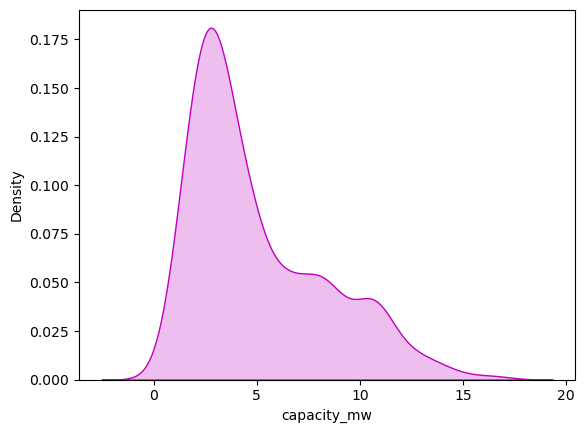

In [184]:
sns.distplot(data["capacity_mw"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()


looks normal almost

Encoding Categorical Columns

In [186]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in data1.columns:
    if data1[i].dtypes=="object":
        data1[i]=OE.fit_transform(data1[i].values.reshape(-1,1))
data1

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9368\1897818799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[i]=OE.fit_transform(data1[i].values.reshape(-1,1))


,primary_fuel,capacity_mw
0,6.0,2.5
1,1.0,98.0
2,7.0,39.2
3,2.0,135.0
4,1.0,1800.0
...,...,...
902,1.0,1600.0
903,6.0,3.0
904,7.0,25.5
905,1.0,80.0


In [187]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 906
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   primary_fuel  887 non-null    float64
 1   capacity_mw   887 non-null    float64
dtypes: float64(2)
memory usage: 20.8 KB


In [188]:
data1.describe()

,primary_fuel,capacity_mw
count,887.000000,887.000000
mean,3.255919,266.871416
std,2.281763,427.766671
min,0.000000,0.000000
25%,1.000000,16.500000
50%,3.000000,50.700000
75%,6.000000,305.000000
max,7.000000,2000.000000


CORRELATION BETWEEN TARGET VARIABLE AND INDEPENDENT VARIABLE

In [189]:
corr=data1.corr()
corr

,primary_fuel,capacity_mw
primary_fuel,1.00000,-0.39899
capacity_mw,-0.39899,1.00000


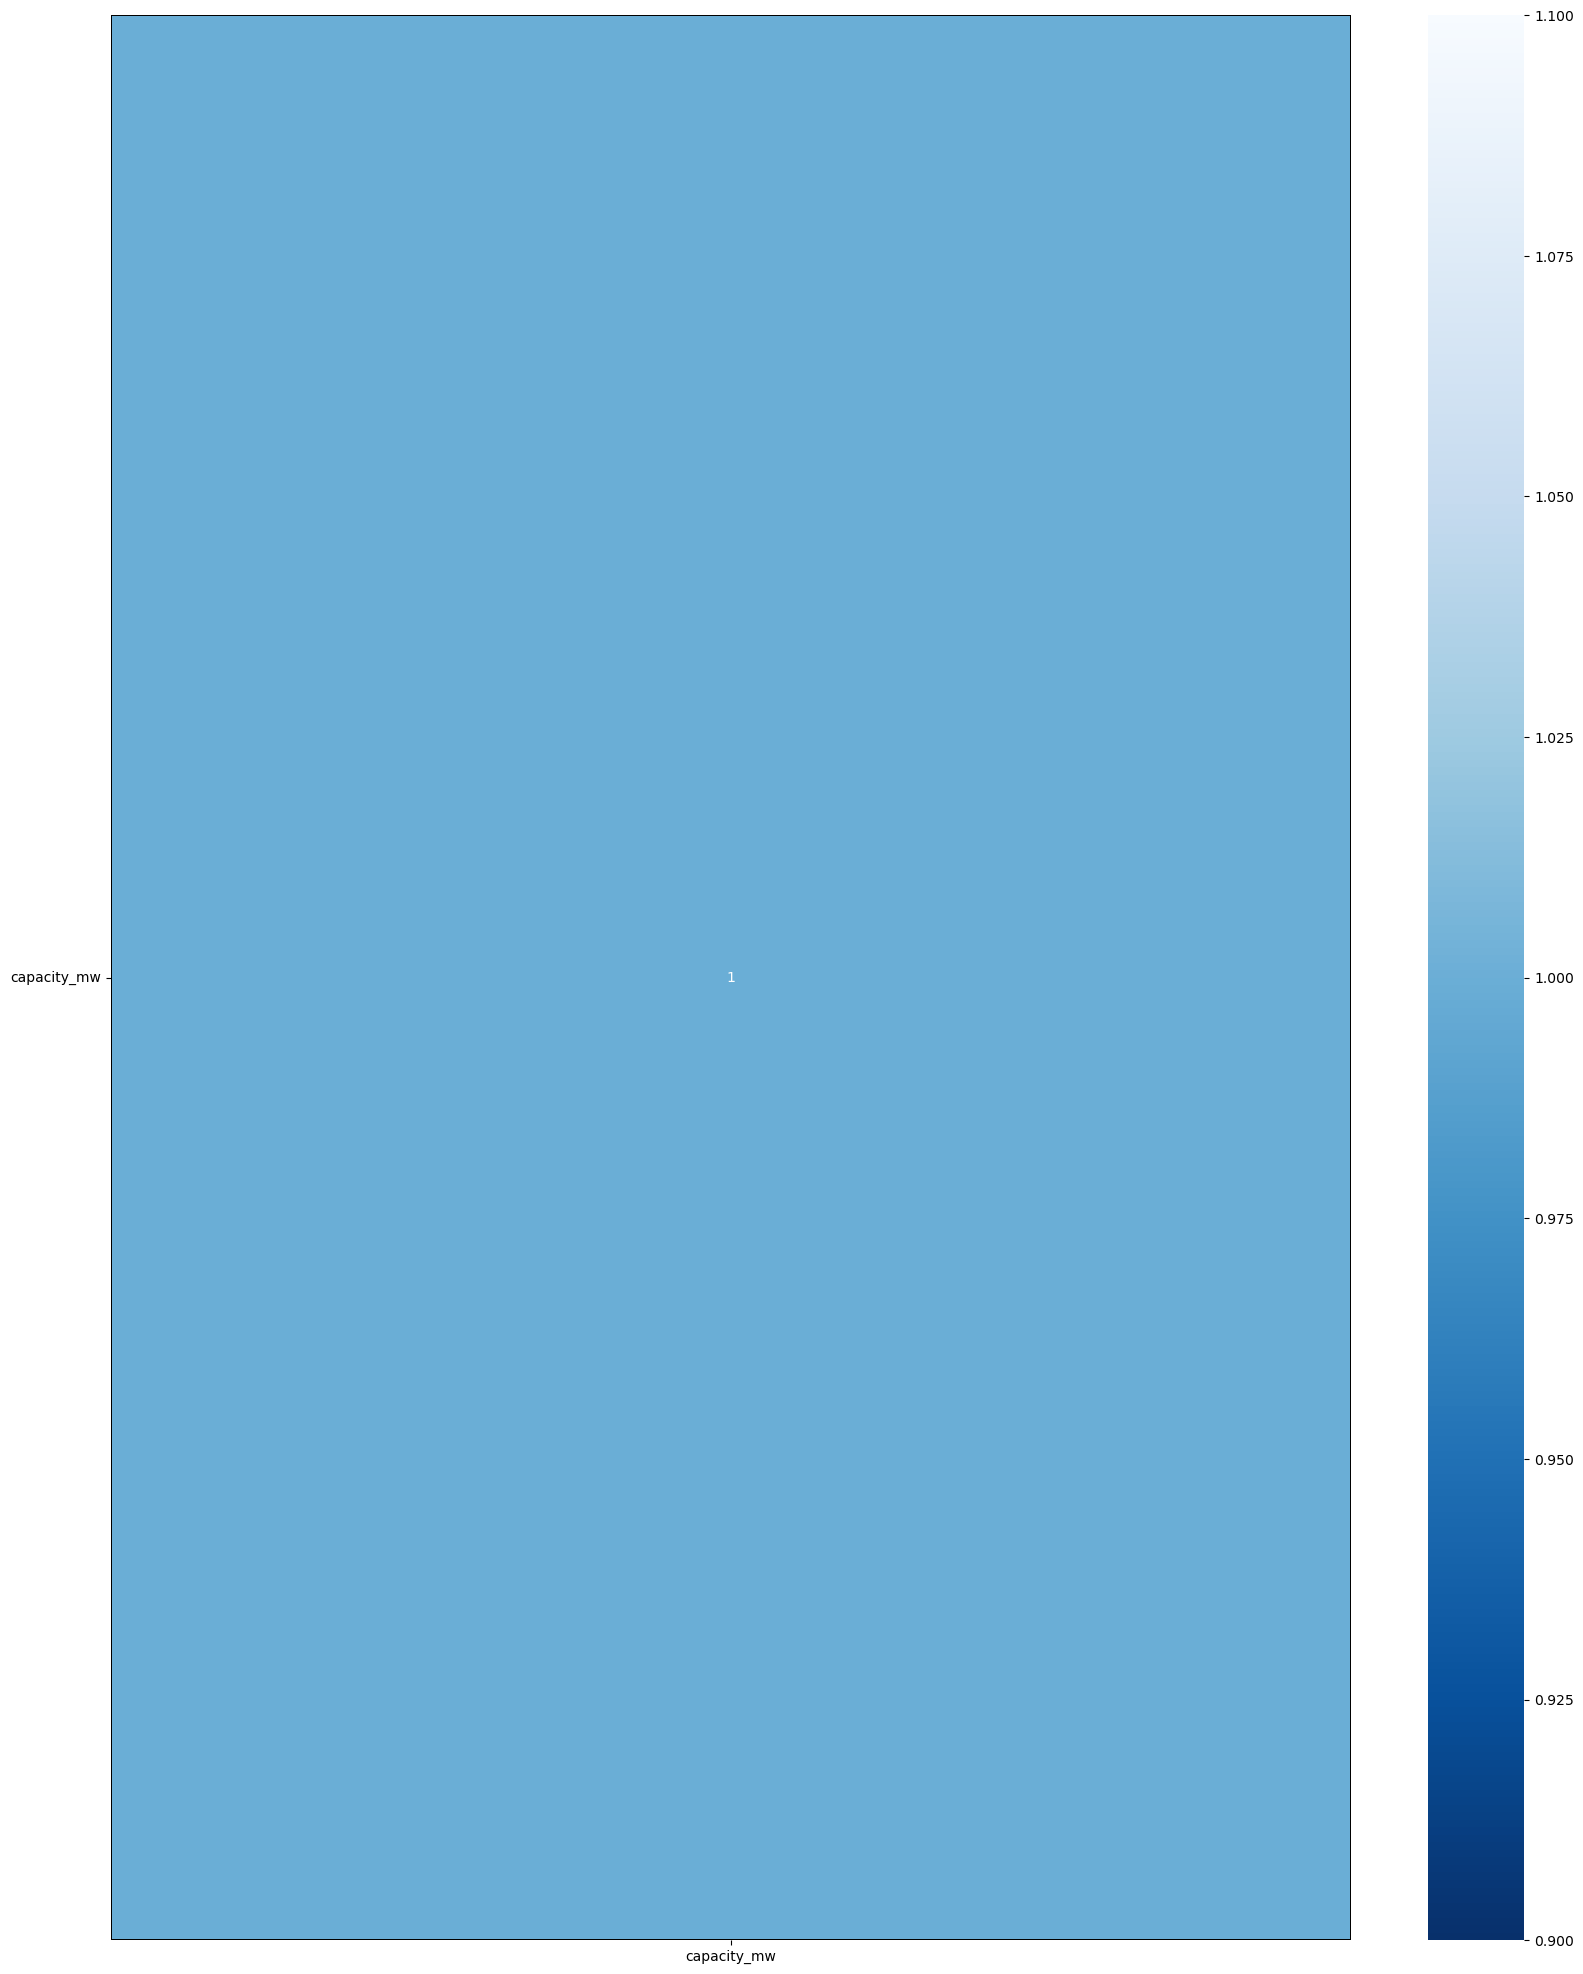

In [190]:
plt.figure(figsize=(20,25))
sns.heatmap(data.corr(),linewidth=0.1,fmt="0.1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

HEAT MAP CONSISTS OF BOTH POSITIVE AND NEGATIVE CORELATION. tOTAL VOLUME AND 4225 AND LARGE BAG HAVE POSITIVE CORELATION WITH TARGET. tYPE HAS HIGH CORELATION. 

In [191]:
corr["primary_fuel"].sort_values(ascending=False)

primary_fuel    1.00000
capacity_mw    -0.39899
Name: primary_fuel, dtype: float64

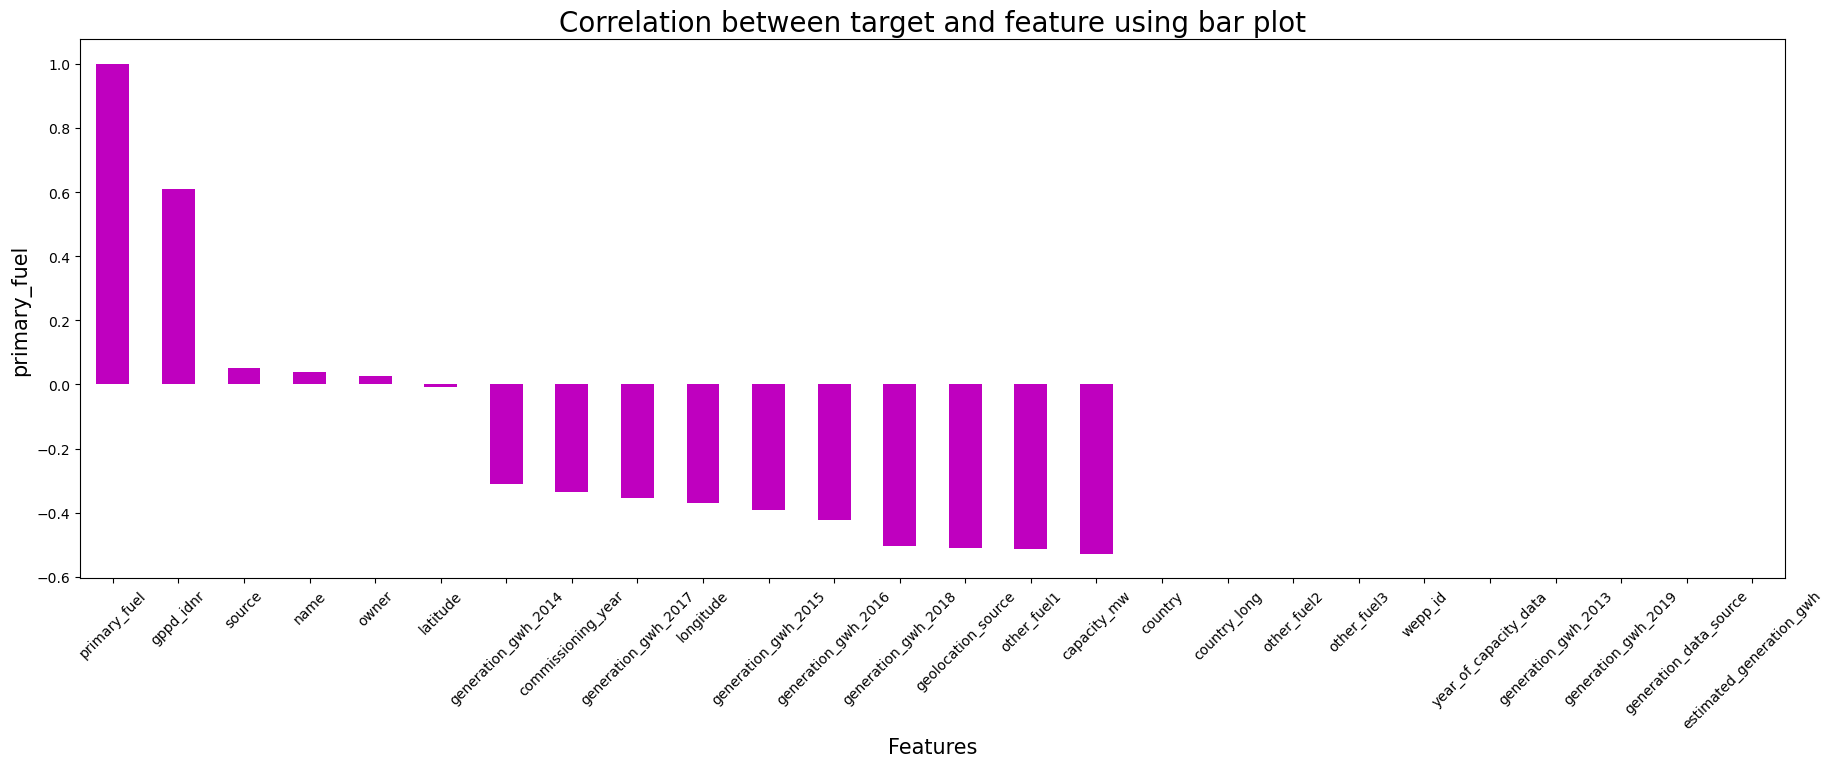

In [72]:
plt.figure(figsize=(22,7), facecolor="white")
data1.corr()["primary_fuel"].sort_values(ascending=False).drop(["url"]).plot(kind="bar",color="m")
plt.xlabel("Features", fontsize=15)  # Set a single x-label for all features
plt.ylabel("primary_fuel", fontsize=15)
plt.title("Correlation between target and feature using bar plot", fontsize=20)
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.show()


Seprating featires and labels

In [192]:
x=data1.drop("primary_fuel",axis=1)
y=data1["primary_fuel"]

In [193]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,capacity_mw
0,-0.618376
1,-0.394997
2,-0.532533
3,-0.308453
4,3.586052
...,...
882,3.118244
883,-0.617206
884,-0.564578
885,-0.437100


In [194]:
print(x.shape)

(887, 1)


In [120]:
y.value_counts()

1.0    258
3.0    251
6.0    126
7.0    123
2.0     69
0.0     50
5.0     20
4.0      9
Name: primary_fuel, dtype: int64

The data is balanced

MODELLING

In [219]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Perform one-hot encoding on the categorical columns
# Separate the features (X) and target variable (y)
X = data.drop('capacity_mw', axis=1)
y = data['capacity_mw']

# Identify categorical columns for one-hot encoding
categorical_columns = ['primary_fuel']

transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')
X_encoded = transformer.fit_transform(X)

In [256]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Drop rows where 'primary_fuel' is in the specified list
drop_fuels = ['Coal', 'Hydro', 'Gas', 'Wind', 'Solar', 'Oil', 'Nuclear', 'Biomass']
data = data[~data['primary_fuel'].isin(drop_fuels)]

# Check if any rows remain in the dataset
if data.shape[0] == 0:
    raise ValueError("No rows remaining after dropping specified fuels.")

# Select the features and target variable
X = data.drop('capacity_mw', axis=1)
y = data['capacity_mw']

# Perform one-hot encoding on the 'primary_fuel' column
encoder = OrdinalEncoder(cols=['primary_fuel'])
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Train the Gradient Boosting Regressor model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


ValueError: No rows remaining after dropping specified fuels.

In [252]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming 'data1' is your filtered DataFrame

# Choose a regression algorithm and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model using R-squared score
r2_score = r2_score(y_test, y_pred)
print("R-squared Score:", r2_score)

# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)




ValueError: could not convert string to float: 'Biomass'

In [224]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.linear_model import Lasso, Ridge
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_lr))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_lr)))


ValueError: Found input variables with inconsistent numbers of samples: [709, 725]

In [56]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_RFR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_RFR)))

R2 score:  0.8008848349385971
R2_score on training data:  97.0747157097554
Mean Absoloute Error:- 0.12439775070290535
Mean Squared Error:- 0.03198705970384255
Root Mean Squared Error:- 0.17884926531535586


In [57]:
Knn=knn()
Knn.fit(x_train,y_train)
pred_Knn=Knn.predict(x_test)
pred_train=Knn.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_Knn))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_Knn))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_Knn))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_Knn)))

R2 score:  0.6469886412820688
R2_score on training data:  75.9900676633224
Mean Absoloute Error:- 0.1695771321462043
Mean Squared Error:- 0.056709871415182744
Root Mean Squared Error:- 0.23813834511725057


In [58]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=Knn.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_GBR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_GBR)))

R2 score:  0.6469886412820688
R2_score on training data:  64.23049456538818
Mean Absoloute Error:- 0.1695771321462043
Mean Squared Error:- 0.056709871415182744
Root Mean Squared Error:- 0.23813834511725057


In [59]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_lasso))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_lasso)))

R2 score:  0.12164011390153207
R2_score on training data:  12.666576385772332
Mean Absoloute Error:- 0.30068042034326836
Mean Squared Error:- 0.14110502386610174
Root Mean Squared Error:- 0.3756394865640482


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.056e+01, tolerance: 2.020e-01
  model = cd_fast.enet_coordinate_descent(


In [60]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_rd))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_rd)))

R2 score:  0.12680858092294944
R2_score on training data:  13.846282552956591
Mean Absoloute Error:- 0.30032652421595296
Mean Squared Error:- 0.14027473018585676
Root Mean Squared Error:- 0.37453268240015686


In [61]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_DTR))

R2_score: 0.5842859368016272


In [62]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_SVR=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_SVR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_SVR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_SVR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_SVR)))

R2 score:  0.40664149374723757
R2_score on training data:  40.46964203780596
Mean Absoloute Error:- 0.2317587830471198
Mean Squared Error:- 0.09532068518958355
Root Mean Squared Error:- 0.3087404819416844


In [63]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_ETR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_ETR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_ETR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_ETR)))

R2 score:  0.815055006120591
R2_score on training data:  100.0
Mean Absoloute Error:- 0.11746125585754452
Mean Squared Error:- 0.029710678035613867
Root Mean Squared Error:- 0.17236785673556965


In [64]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score.mean())*100)

[ -3.82689126  -0.56657981  -0.71477469  -0.30192223 -58.26040958]
-12.734115516983547
difference between r2 score and cross validation score is - 1353.5000351922142


In [65]:

score2=cross_val_score(Knn,x,y)
print(score2)
print(score2.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score2.mean())*100)

[-1.14193351  0.18932864  0.28536874 -0.07639819 -0.26485232]
-0.201697326240933
difference between r2 score and cross validation score is - 100.258216117953


In [66]:
score3=cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score3.mean())*100)

[-0.81610599  0.29384583  0.42290693  0.1206625  -0.02259166]
-0.0002564773074748672
difference between r2 score and cross validation score is - 80.1141312246072


In [67]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score4.mean())*100)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.408e+02, tolerance: 2.279e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.397e+02, tolerance: 2.363e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.928e+01, toleranc

[-3.14100535 -0.54601654  0.07762155 -0.19109535 -0.56342921]
-0.8727849798631148
difference between r2 score and cross validation score is - 167.36698148017118


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.075e+01, tolerance: 1.920e-01
  model = cd_fast.enet_coordinate_descent(


In [68]:

score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score5.mean())*100)

[ -3.82679998  -0.56620669  -0.71466843  -0.30191594 -52.61679014]
-11.605276233626032
difference between r2 score and cross validation score is - 1240.616106856463


In [69]:

score6=cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score6.mean())*100)

[-1.46797892 -0.41917371 -0.17402012 -0.53585605 -0.56078725]
-0.6315632092011529
difference between r2 score and cross validation score is - 143.244804413975


In [70]:
score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score7.mean())*100)

[-0.87117388  0.16172454  0.40404721  0.01616365 -0.27994419]
-0.11383653559888433
difference between r2 score and cross validation score is - 91.47213705374814


In [71]:

score8=cross_val_score(etr,x,y)
print(score8)
print(score8.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score8.mean())*100)

[-1.08442032  0.23519988  0.39178823 -0.62486286 -0.08706011]
-0.23387103652990016
difference between r2 score and cross validation score is - 103.47558714684972


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param = {
    'alpha': [1.0, 0.05, 4.2],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'cbfgs'],
    'positive': [False, True],
    'random_state': [1, 4, 10, 20]
}

ridge = Ridge()
gscv = GridSearchCV(ridge, param, cv=5)
gscv.fit(x_train, y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1011, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 782, in fit
    self.coef_, self.n_iter_ = _ridge_regress

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 4.2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'cbfgs']})

In [79]:
best_params = gscv.best_params_
print(best_params)


{'alpha': 4.2, 'fit_intercept': True, 'positive': False, 'random_state': 1, 'solver': 'svd'}


In [80]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Create and fit the Ridge model with the best parameters
model = Ridge(alpha=0.05, fit_intercept=True, positive=False, random_state=1, solver='auto')
model.fit(x_train, y_train)

# Make predictions on the test data
pred = model.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print('r2_score:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

r2_score: 0.12680533182896203
Mean Absolute Error: 0.3003279668856517
Mean Squared Error: 0.14027525213988937
Root Mean Squared Error: 0.374533379206566


In [81]:
import joblib
import pickle
import pandas as pd

# Save the model using joblib
# joblib.dump(model, 'avocado.pkl')

# Save the model using pickle
filename = "baseball.pkl"
pickle.dump(model, open(filename, 'wb'))

# Load the model
loaded_model = pickle.load(open('baseball.pkl', 'rb'))

# Calculate the score on the test data
result = loaded_model.score(x_test, y_test)
print(result * 100)

# Create a DataFrame for predictions and original values
conclusion = pd.DataFrame({'predicted': loaded_model.predict(x_test), 'original': y_test})
print(conclusion)

12.680533182896204
       predicted  original
877     1.415796      1.22
17474   1.254434      1.64
12217   1.471197      1.80
9002    1.457058      1.34
7744    1.496731      1.36
...          ...       ...
16756   1.519767      1.41
952     1.286737      0.89
10153   1.425500      1.81
14266   1.472444      1.55
16950   1.517789      1.97

[5335 rows x 2 columns]
